In [105]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
item_tags = pd.read_csv(r"C:\Users\skjos\Desktop\Learnosity\data\items_tags.csv", engine = "python")
sessions_path = r"C:\Users\skjos\Desktop\Learnosity\data\sessions-*.csv"
sessionsq_path = r"C:\Users\skjos\Desktop\Learnosity\data\sessionsquestions-*.csv"
sessions_df = pd.concat([pd.read_csv(path,lineterminator="\n") for path in glob.glob(sessions_path)])
sessionsq_df = pd.concat([pd.read_csv(path,lineterminator="\n") for path in glob.glob(sessionsq_path)])

C:\Users\skjos\AppData\Local\Temp/ipykernel_10300/3168431384.py:5: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  sessionsq_df = pd.concat([pd.read_csv(path,lineterminator="\n") for path in glob.glob(sessionsq_path)])


# Items Tags

In [43]:
item_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290293 entries, 0 to 290292
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   item_reference  290293 non-null  object
 1   tagtype         290293 non-null  object
 2   tag             290293 non-null  object
dtypes: object(3)
memory usage: 6.6+ MB


# Sessions 

In [44]:
sessions_df = sessions_df.drop(["activity_id","session_dt_saved","user_dt_created","activity_template_id","item_pool_id","current_time"], axis=1)
#.set_index("session_id",drop=False)
sessions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925014 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   session_id                      object 
 1   session_dt_started              object 
 2   session_dt_completed            object 
 3   session_score                   float64
 4   session_max_score               float64
 5   session_max_score_of_attempted  float64
 6   session_max_score_of_unmarked   float64
 7   session_num_questions           int64  
 8   session_num_attempted           int64  
 9   user_id                         int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 161.6+ MB


# Sessions Questions

In [45]:
#sessionsq_df = sessionsq_df.set_index("response_id",drop=False)
sessionsq_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3614607 entries, 0 to 177335
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   session_id             object 
 1   user_id                int64  
 2   response_id            object 
 3   item_reference         object 
 4   question_type          object 
 5   question_dt_created    object 
 6   question_dt_updated    object 
 7   question_automarkable  int64  
 8   question_attempted     int64  
 9   question_score         float64
 10  question_max_score     float64
dtypes: float64(2), int64(3), object(6)
memory usage: 330.9+ MB


# Filter & Join

In [143]:
filter_data = item_tags[item_tags.tagtype == "COURSE"]
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63003 entries, 2 to 290250
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   item_reference  63003 non-null  object
 1   tagtype         63003 non-null  object
 2   tag             63003 non-null  object
dtypes: object(3)
memory usage: 1.9+ MB


In [144]:
join_data = sessionsq_df.merge(filter_data, on="item_reference")
join_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312770 entries, 0 to 312769
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   session_id             312770 non-null  object 
 1   user_id                312770 non-null  int64  
 2   response_id            312770 non-null  object 
 3   item_reference         312770 non-null  object 
 4   question_type          312770 non-null  object 
 5   question_dt_created    312770 non-null  object 
 6   question_dt_updated    312770 non-null  object 
 7   question_automarkable  312770 non-null  int64  
 8   question_attempted     312770 non-null  int64  
 9   question_score         266392 non-null  float64
 10  question_max_score     310511 non-null  float64
 11  tagtype                312770 non-null  object 
 12  tag                    312770 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 33.4+ MB


In [145]:
session_data_join = sessions_df.merge(join_data, on=["session_id","user_id"])
session_data_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312770 entries, 0 to 312769
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   session_id                      312770 non-null  object 
 1   session_dt_started              312770 non-null  object 
 2   session_dt_completed            299949 non-null  object 
 3   session_score                   312770 non-null  float64
 4   session_max_score               312770 non-null  float64
 5   session_max_score_of_attempted  312770 non-null  float64
 6   session_max_score_of_unmarked   312770 non-null  float64
 7   session_num_questions           312770 non-null  int64  
 8   session_num_attempted           312770 non-null  int64  
 9   user_id                         312770 non-null  int64  
 10  response_id                     312770 non-null  object 
 11  item_reference                  312770 non-null  object 
 12  question_type   

# Plot Visualization

## Descriptive Statistics

In [124]:
session_data_join.describe(include="all")

,session_id,session_dt_started,session_dt_completed,session_score,session_max_score,session_max_score_of_attempted,session_max_score_of_unmarked,session_num_questions,session_num_attempted,user_id,...,item_reference,question_type,question_dt_created,question_dt_updated,question_automarkable,question_attempted,question_score,question_max_score,tagtype,tag
count,312770,312770,299949,312770.000000,312770.000000,312770.000000,312770.000000,312770.000000,312770.000000,3.127700e+05,...,312770,312770,312770,312770,312770.000000,312770.000000,266392.000000,310511.000000,312770,312770
unique,134944,28513,126012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16457,30,28520,198704,NaN,NaN,NaN,NaN,1,38
top,60dd4090-d716-44ec-ba9e-b0be42a52261,2018-11-28 04:24:00,2018-08-16 03:18:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,04132016104057437766,mcq,2018-11-28 04:24:00,2018-08-07 02:07:42,NaN,NaN,NaN,NaN,COURSE,CH11_VIC
freq,85,200,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,715,84069,200,72,NaN,NaN,NaN,NaN,312770,38339
mean,NaN,NaN,NaN,3.669950,5.929255,4.258884,0.097477,5.809096,4.176551,1.668854e+06,...,NaN,NaN,NaN,NaN,0.979518,0.867791,0.940690,1.033896,NaN,NaN
std,NaN,NaN,NaN,4.178131,6.484768,4.949474,1.087268,6.248266,4.722770,2.128669e+05,...,NaN,NaN,NaN,NaN,0.141641,0.338718,0.356211,0.355321,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.930000e+02,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.500000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.564881e+06,...,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,2.000000,3.000000,2.000000,0.000000,3.000000,2.000000,1.766562e+06,...,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,5.000000,10.000000,5.000000,0.000000,10.000000,5.000000,1.799191e+06,...,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN


## Pearson

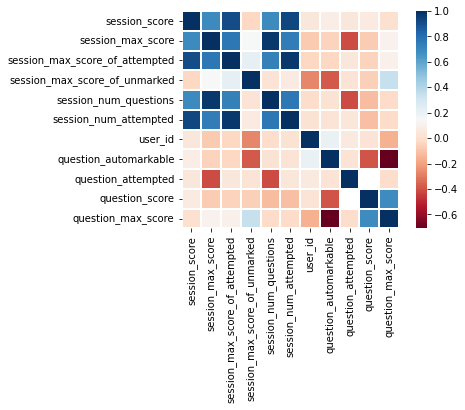

In [126]:
p = session_data_join.corr(method="pearson")
sns.heatmap(p.round(2), vmax = 1,cmap= plt.cm.RdBu,square = True,linewidths=0.1 )
plt.show()

## Spearman

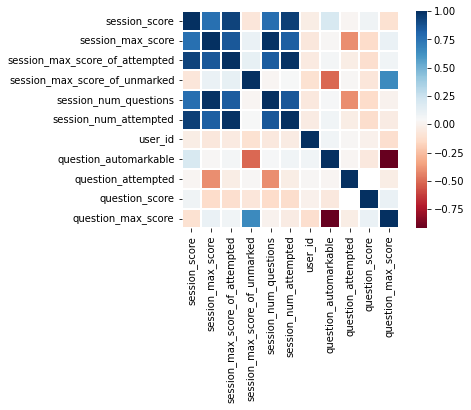

In [135]:
p = session_data_join.corr(method="spearman")
sns.heatmap(p.round(2), vmax = 1,cmap= plt.cm.RdBu,square = True,linewidths=0.1 )
plt.show()

## Bar Plot

In [159]:
session_data_join[["session_id","tag","session_score","session_max_score","question_score","question_max_score","question_attempted"]]

,session_id,tag,session_score,session_max_score,question_score,question_max_score,question_attempted
0,ba5569d2-f822-4d56-9591-aa60bc632b75,PS08_LBS_AU,2.0,2.0,1.0,1.0,1
1,ba5569d2-f822-4d56-9591-aa60bc632b75,PS08_LBS_AU,2.0,2.0,1.0,1.0,1
2,c11df52b-abe6-429c-8b60-34750888d79e,PS07_LBS_AU,1.0,1.0,1.0,1.0,1
3,7ea0f12c-dc8e-4631-8410-e869af8982f3,PM08_LBS_AU,3.0,3.0,1.0,1.0,1
4,7ea0f12c-dc8e-4631-8410-e869af8982f3,PM08_LBS_AU,3.0,3.0,1.0,1.0,1
...,...,...,...,...,...,...,...
312765,990ee45e-d317-4c01-a96d-26a8b0f3339e,HUM07_LBS_VIC,0.0,22.0,NaN,3.0,1
312766,990ee45e-d317-4c01-a96d-26a8b0f3339e,HUM07_LBS_VIC,0.0,22.0,NaN,3.0,1
312767,990ee45e-d317-4c01-a96d-26a8b0f3339e,HUM07_LBS_VIC,0.0,22.0,NaN,3.0,1
312768,990ee45e-d317-4c01-a96d-26a8b0f3339e,HUM07_LBS_VIC,0.0,22.0,NaN,3.0,1


In [165]:
session_data_join[["tag","question_score","question_max_score"]].groupby(["tag"]).sum()

,question_score,question_max_score
tag,,
CH11_DEMO,441.00,719.0
CH11_VIC,30720.00,40311.0
CH11_WA,23636.00,32013.0
CH12_VIC,23660.00,28464.0
CH12_WA,10862.00,13996.0
ES_N1_SA,104.50,155.0
FUSE_SA,1179.00,1880.0
GM11_DEMO,655.00,809.0
GM11_VIC,467.00,620.0


In [187]:
x = session_data_join.pivot_table(index="tag",columns="question_attempted",aggfunc="size",fill_value=0)
y = pd.DataFrame(x.to_records()).set_index("tag")
y

,0,1
tag,,
CH11_DEMO,127,535
CH11_VIC,6941,31398
CH11_WA,6139,23974
CH12_VIC,3339,24638
CH12_WA,2213,11366
ES_N1_SA,22,123
FUSE_SA,584,1232
GM11_DEMO,116,763
GM11_VIC,113,577


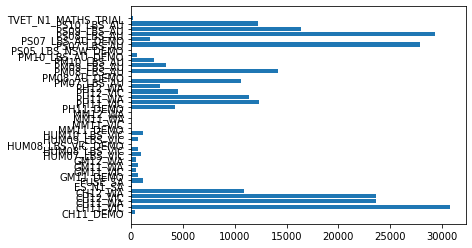

In [181]:
scores = session_data_join[["tag","question_score","question_max_score"]].groupby(["tag"]).sum() 
plt.barh(scores.index,scores["question_score"])
plt.show()

,session_id,session_num_questions


## Bar Chart

In [80]:
labels = session_data_join["tag"].unique().tolist()
values = session_data_join[["tag","session_score"]].groupby("tag").sum() / session_data_join[["tag","session_score"]].groupby("tag").count()
values
#plt.barh(labels,values)
#plt.show()

,session_score
tag,
CH11_DEMO,4.348943
CH11_VIC,4.941157
CH11_WA,5.665028
CH12_VIC,4.440326
CH12_WA,4.881803
ES_N1_SA,3.493103
FUSE_SA,6.879405
GM11_DEMO,6.805461
GM11_VIC,3.372464


In [ ]:
item_tags.info()

In [ ]:
data_new  = data[["tagtype","tag"]]
data_merge = item_tags.merge(data_new, on="tag")

In [ ]:
data_merge.head()

In [ ]:
data_merge[data_merge["tagtype_x"] != data_merge["tagtype_y"]]

In [63]:
x = None

In [64]:
if x:
    print("Not")
else:
    print("Yes")

Yes
